In [386]:
"""
01_log_clean.ipynb
[02-02-2025]: removed Q_27 (Age) and Q_28 (Gender) from features
[02-02-2025]: TotalTimeMM from features
"""

'\n01_log_clean.ipynb\n[02-02-2025]: removed Q_27 (Age) and Q_28 (Gender) from features\n[02-02-2025]: TotalTimeMM from features\n'

# Event log cleaning, prefix extraction and encoding

In [387]:
### IMPORT ###
from pathlib import Path
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

### LOCAL IMPORT ###
from config import config_reader
from utilities import create_directories_with_gitkeep

In [388]:
### GLOBALS ###
yaml_config = config_reader.config_read_yaml("config.yml", "config")
log_dir = str(yaml_config["LOG_DIR"])
csv_sep = str(yaml_config["CSV_SEP"])

# INPUT
level_input = "PAGE" # [PAGE, PARA]
log_file = "edu_event_log_LEVEL_raw_filtered_DISCO_ter_enr_no_SURVEY.csv" # The main file

# Column (feature) names
id_variable = "Case ID" 
event_variable = "Activity"
timestamp_variable = "Complete Timestamp"

In [389]:
# INPUT
target_variable = "UEQ - Overall_Tercile" # Target variable for the prediction

In [390]:
# OUTPUT
prefix_dir = str(yaml_config["PREFIX_DIR"])

## FUNCTIONS

In [391]:
def compute_target_distribution(df: pd.DataFrame, target_variable: str) -> pd.DataFrame:
    """
    Computes the distribution of values in the specified target variable, including NaN as a separate category.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing the target variable.
        target_variable (str): The name of the column for which the distribution is to be calculated.

    Returns:
        pd.DataFrame: A DataFrame with three columns:
            - target_variable: Unique values from the target variable, including NaN if present.
            - count: The frequency of each unique value.
            - percentage: The percentage representation of each unique value relative to the total number of rows.
    """
    # Calculate the distribution of values in the target_variable column, including NaN as a separate category
    df_target_distribution = df[target_variable].value_counts(dropna=False).reset_index()
    df_target_distribution.columns = [target_variable, 'count']  # Rename columns for clarity

    # Add a percentage column to indicate the proportion of each value
    df_target_distribution['percentage'] = round(df_target_distribution['count'] / len(df), 2) * 100

    return df_target_distribution

In [392]:
def plot_histogram(df: pd.DataFrame, label_column: str, value_column: str) -> None:
    """
    Plot a histogram with labels on the x-axis and their corresponding values on the y-axis.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        label_column (str): The name of the column containing labels for the x-axis.
        value_column (str): The name of the column containing values for the y-axis.
    """
    # Ensure the value column contains numeric data
    if not pd.api.types.is_numeric_dtype(df[value_column]):
        raise ValueError(f"The column '{value_column}' must contain numeric data.")

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(df[label_column], df[value_column], alpha=0.7, edgecolor='black')
    
    # Adding labels and title
    plt.xlabel(label_column)
    plt.ylabel(value_column)
    plt.title(f"Histogram of '{label_column}' vs {value_column}")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

## MAIN

In [393]:
print()
print("*** PROGRAM START ***")
print()


*** PROGRAM START ***



In [394]:
start_time = datetime.now().replace(microsecond=0)
print("Start process:", str(start_time))
print()

Start process: 2025-02-06 09:30:33



In [395]:
print("> Settings")
# print(yaml_config) # debug
print("CSV separator:", csv_sep)
print("Input level:", level_input)
log_file_name = log_file.replace("LEVEL", level_input)
print("Input file:", log_file_name)
path_log_file = Path(log_dir) /log_file_name 
print("Path file:", path_log_file)

> Settings
CSV separator: ,
Input level: PAGE
Input file: edu_event_log_PAGE_raw_filtered_DISCO_ter_enr_no_SURVEY.csv
Path file: data_log/edu_event_log_PAGE_raw_filtered_DISCO_ter_enr_no_SURVEY.csv


In [396]:
print(">> Creating output directories")
dir_output = []
dir_output.append(prefix_dir)
create_directories_with_gitkeep(dir_output)

>> Creating output directories
Directory 'data_prefix' and .gitkeep file created


In [397]:
print("> Reading event log")
# Column (feature) types
dic_t = {id_variable:object}
print("Input event log column types:", dic_t)
df_log = pd.read_csv(path_log_file, dtype=dic_t, sep=csv_sep, low_memory=False)
print("Distinct cases read:", df_log[id_variable].nunique())
print("Dataframe shape:", df_log.shape)

> Reading event log
Input event log column types: {'Case ID': <class 'object'>}
Distinct cases read: 332
Dataframe shape: (7399, 74)


In [398]:
df_log.head(5)

,Case ID,Activity,Complete Timestamp,pageTitle,menu,pageOrder,pagePara,eventPage,click_num,dbclick_num,...,FN_N,FN_Q,FN_A,FN_C,FN_I,FN_CT,A_Time_s,A_Time_m,Forward_Jumps,Backward_Jumps
0,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,INTRO,2024-04-22 14:11:42,INTRO,menu_1,1,0,PageIN,1,0,...,0.0,0.0,1.0,1.0,0.0,FA,530.0,8.83,0,0
1,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,INTRO-Q,2024-04-22 14:20:32,INTRO-Q,menu_1,1,0,PageIN,1,0,...,0.0,0.0,1.0,1.0,0.0,FA,32.0,0.53,0,0
2,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,PROG,2024-04-22 14:21:04,PROG,menu_1,2,0,PageIN,1,0,...,0.0,0.0,1.0,1.0,0.0,FA,233.0,3.88,0,0
3,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,PROG-Q,2024-04-22 14:24:57,PROG-Q,menu_1,2,0,PageIN,1,0,...,0.0,0.0,1.0,1.0,0.0,FA,17.0,0.28,0,0
4,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,VARS,2024-04-22 14:25:14,VARS,menu_1,3,0,PageIN,1,0,...,0.0,0.0,1.0,1.0,0.0,FA,119.0,1.98,0,0


In [399]:
df_log.columns

Index(['Case ID', 'Activity', 'Complete Timestamp', 'pageTitle', 'menu',
       'pageOrder', 'pagePara', 'eventPage', 'click_num', 'dbclick_num',
       'QuizSessionCount', 'QuizAnswerCorrectTotal', 'QuizAnswerWrongTotal',
       'QuizAnswerCorrectRatioOverCount', 'QuizAnswerCorrectRatioOverAll',
       'QuizSessionCount_P3', 'QuizAnswerCorrectTotal_P3',
       'QuizAnswerWrongTotal_P3', 'QuizAnswerCorrectRatioOverCount_P3',
       'QuizAnswerCorrectRatioOverAll_P3', 'Q_1', 'Q_2', 'Q_3', 'Q_4', 'Q_5',
       'Q_6', 'Q_7', 'Q_8', 'Q_9', 'Q_10', 'Q_11', 'Q_12', 'Q_13', 'Q_14',
       'Q_15', 'Q_16', 'Q_17', 'Q_18', 'Q_19', 'Q_20', 'Q_21', 'Q_22', 'Q_23',
       'Q_24', 'Q_25', 'Q_26', 'Q_27', 'Q_28', 'SUS',
       'Apprendimento percepito', 'UEQ - Pragmatic', 'UEQ - Hedonic',
       'UEQ - Overall', 'TotalTimeHH', 'TotalTimeMM', 'TotalTimeMM.1',
       'TotalTimeDD', 'CaseLength', 'Class', 'SUS_Tercile',
       'Apprendimento percepito_Tercile', 'UEQ - Overall_Tercile',
       'QuizAnswe

In [400]:
df_log.dtypes

Case ID                object
Activity               object
Complete Timestamp     object
pageTitle              object
menu                   object
                       ...   
FN_CT                  object
A_Time_s              float64
A_Time_m              float64
Forward_Jumps           int64
Backward_Jumps          int64
Length: 74, dtype: object

In [401]:
print("Distinct cases before cleaning:", df_log[id_variable].nunique())

Distinct cases before cleaning: 332


## Distribution of the target variable

In [402]:
print(">> Target variable")
print("Feature (column) name:", target_variable)
print("Distinct values:", df_log[target_variable].unique().tolist())

>> Target variable
Feature (column) name: UEQ - Overall_Tercile
Distinct values: [1, 3, 2]


In [403]:
df_target_distribution = compute_target_distribution(df_log, target_variable)

In [404]:
df_target_distribution

,UEQ - Overall_Tercile,count,percentage
0,2,2700,36.0
1,1,2642,36.0
2,3,2057,28.0


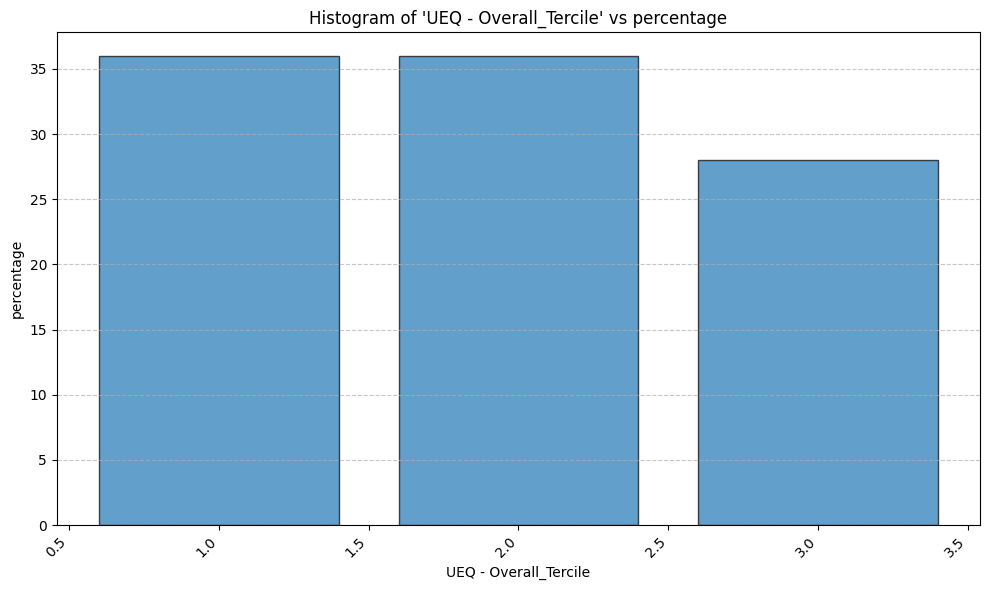

In [405]:
plot_histogram(df_target_distribution, target_variable, "percentage")

## Cleaning the event log

In [406]:
print(">> Cleaning the event log")

>> Cleaning the event log


In [407]:
print(f"> Removing cases where feature (column) '{target_variable}' is NaN")
print("Dataframe shape before cleaning:", df_log.shape)
print("Distinct before before cleaning:", df_log[id_variable].nunique())
df_log_clean = df_log.dropna(subset=[target_variable])
print("Dataframe shape after cleaning:", df_log_clean.shape)
print("Distinct before after cleaning:", df_log_clean[id_variable].nunique())

> Removing cases where feature (column) 'UEQ - Overall_Tercile' is NaN
Dataframe shape before cleaning: (7399, 74)
Distinct before before cleaning: 332
Dataframe shape after cleaning: (7399, 74)
Distinct before after cleaning: 332


In [408]:
# Calculates partial values at the time of the prefix (e.g. ratio of correct quizzes)
print("> Getting values at the prefix time")


> Getting values at the prefix time


In [409]:
print("> Removing feature (column) not needed")

# Define the list of columns to remove (also Q_27 Age and Q_28 Gender)
columns_to_remove = [
    "pageOrder", "pagePara", "eventPage", "menu", "QuizSessionCount", "QuizAnswerCorrectTotal",
    "QuizAnswerWrongTotal", "QuizAnswerCorrectRatioOverCount", "QuizAnswerCorrectRatioOverAll", "QuizAnswerCorrectRatioOverAll_Tercile", "Q_1", "Q_2", "Q_3", "Q_4",
    "Q_5", "Q_6", "Q_7", "Q_8", "Q_9", "Q_10", "Q_11", "Q_12", "Q_13", "Q_14", "Q_15", "Q_16",
    "Q_17", "Q_18", "Q_19", "Q_20", "Q_21", "Q_22", "Q_23", "Q_24", "Q_25", "Q_26", "Q_27", "Q_28", "TotalTimeMM", "SUS", "Apprendimento percepito", "UEQ - Pragmatic", "UEQ - Hedonic", "UEQ - Overall",
    "TotalTimeHH", "TotalTimeDD", "CaseLength", "TotalTimeMM.1"
]

# Remove columns from df_log_clean if they exist
df_log_clean = df_log_clean.drop(columns=[col for col in columns_to_remove if col in df_log_clean.columns])
print("Columns in the dataframe after cleaning:", df_log_clean.columns)

> Removing feature (column) not needed
Columns in the dataframe after cleaning: Index(['Case ID', 'Activity', 'Complete Timestamp', 'pageTitle', 'click_num',
       'dbclick_num', 'QuizSessionCount_P3', 'QuizAnswerCorrectTotal_P3',
       'QuizAnswerWrongTotal_P3', 'QuizAnswerCorrectRatioOverCount_P3',
       'QuizAnswerCorrectRatioOverAll_P3', 'Class', 'SUS_Tercile',
       'Apprendimento percepito_Tercile', 'UEQ - Overall_Tercile',
       'Class_Count', 'FN_N', 'FN_Q', 'FN_A', 'FN_C', 'FN_I', 'FN_CT',
       'A_Time_s', 'A_Time_m', 'Forward_Jumps', 'Backward_Jumps'],
      dtype='object')


In [410]:
# print("> Renaming features (columns)")
# df_log_clean = df_log_clean.rename(columns={'Q_27': 'Age', 'Q_28': 'Gender'})

In [411]:
df_log_clean.head()

,Case ID,Activity,Complete Timestamp,pageTitle,click_num,dbclick_num,QuizSessionCount_P3,QuizAnswerCorrectTotal_P3,QuizAnswerWrongTotal_P3,QuizAnswerCorrectRatioOverCount_P3,...,FN_N,FN_Q,FN_A,FN_C,FN_I,FN_CT,A_Time_s,A_Time_m,Forward_Jumps,Backward_Jumps
0,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,INTRO,2024-04-22 14:11:42,INTRO,1,0,3.0,2.0,1.0,0.67,...,0.0,0.0,1.0,1.0,0.0,FA,530.0,8.83,0,0
1,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,INTRO-Q,2024-04-22 14:20:32,INTRO-Q,1,0,3.0,2.0,1.0,0.67,...,0.0,0.0,1.0,1.0,0.0,FA,32.0,0.53,0,0
2,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,PROG,2024-04-22 14:21:04,PROG,1,0,3.0,2.0,1.0,0.67,...,0.0,0.0,1.0,1.0,0.0,FA,233.0,3.88,0,0
3,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,PROG-Q,2024-04-22 14:24:57,PROG-Q,1,0,3.0,2.0,1.0,0.67,...,0.0,0.0,1.0,1.0,0.0,FA,17.0,0.28,0,0
4,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,VARS,2024-04-22 14:25:14,VARS,1,0,3.0,2.0,1.0,0.67,...,0.0,0.0,1.0,1.0,0.0,FA,119.0,1.98,0,0


## Prefix

In [412]:
print(f">> Prefix extraction")
# Define mandatory and optional lists
list_mandatory = ['INTRO', 'PROG', 'VARS']
list_optional = ['INTRO-Q', 'PROG-Q', 'VARS-Q']
print("Mandatory values:", list_mandatory)
print("Optional values:", list_optional)

>> Prefix extraction
Mandatory values: ['INTRO', 'PROG', 'VARS']
Optional values: ['INTRO-Q', 'PROG-Q', 'VARS-Q']


In [413]:
# Create lists to store prefixes and remaining activities
prefixes = []
ongoing_list = []

# Process each case ID individually
for case_id, group in df_log_clean.groupby(id_variable):
    # Filter events up to include only mandatory and optional ones for prefix
    prefixed_group = group[group['Activity'].isin(list_mandatory + list_optional)]
    # Collect the prefix activities (used for training) with all original columns
    prefixes.append(prefixed_group)
    
    # Determine the remaining/ongoing activities (events after mandatory and optional ones) with all columns
    # ongoing_group = group[~group['Activity'].isin(list_mandatory + list_optional)]
    #ongoing_list.append(ongoing_group)

# Concatenate all individual DataFrames into final DataFrames for prefixes and ongoing activities
# 1. Full DataFrame with prefixes (all details included)
df_prefixes_full = pd.concat(prefixes, ignore_index=True)

# 3. Simplified DataFrame with only Case ID and prefix activities for easy viewing
df_prefixes_list = df_prefixes_full[['Case ID', 'Activity']].groupby('Case ID').agg(list).reset_index()


In [414]:
print("Unique cases in prefix:", df_prefixes_full[id_variable].nunique())

Unique cases in prefix: 332


In [415]:
df_prefixes_full.head(5)

,Case ID,Activity,Complete Timestamp,pageTitle,click_num,dbclick_num,QuizSessionCount_P3,QuizAnswerCorrectTotal_P3,QuizAnswerWrongTotal_P3,QuizAnswerCorrectRatioOverCount_P3,...,FN_N,FN_Q,FN_A,FN_C,FN_I,FN_CT,A_Time_s,A_Time_m,Forward_Jumps,Backward_Jumps
0,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,INTRO,2024-04-22 14:11:42,INTRO,1,0,3.0,2.0,1.0,0.67,...,0.0,0.0,1.0,1.0,0.0,FA,530.0,8.83,0,0
1,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,INTRO-Q,2024-04-22 14:20:32,INTRO-Q,1,0,3.0,2.0,1.0,0.67,...,0.0,0.0,1.0,1.0,0.0,FA,32.0,0.53,0,0
2,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,PROG,2024-04-22 14:21:04,PROG,1,0,3.0,2.0,1.0,0.67,...,0.0,0.0,1.0,1.0,0.0,FA,233.0,3.88,0,0
3,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,PROG-Q,2024-04-22 14:24:57,PROG-Q,1,0,3.0,2.0,1.0,0.67,...,0.0,0.0,1.0,1.0,0.0,FA,17.0,0.28,0,0
4,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,VARS,2024-04-22 14:25:14,VARS,1,0,3.0,2.0,1.0,0.67,...,0.0,0.0,1.0,1.0,0.0,FA,119.0,1.98,0,0


In [416]:
df_prefixes_list.head(5)

,Case ID,Activity
0,0HcsM5K14bTga4CpYETnQuMBKMrDBCQgHeGk48sRul6Pha...,"[INTRO, INTRO-Q, PROG, PROG-Q, VARS, VARS-Q]"
1,0fEI3C7ZVbHNPQ3hgqWpnF97S5Crv15NcK8WakL64pyRIO...,"[INTRO, INTRO-Q, PROG, PROG-Q, VARS, VARS-Q]"
2,0yvCRzdOzkoVYbnkbkS1oIVWv8auRHmPUJ7ck1uYsO9nCd...,"[INTRO, INTRO-Q, PROG, PROG-Q, VARS, VARS-Q]"
3,1JRSaFuQOcATjahn7vxyD1JzbiRCR14OLT0Jd2GVOgGT7T...,"[INTRO, INTRO-Q, PROG, PROG-Q, VARS, VARS-Q]"
4,1JolpU4UO7I6WIHBXiGghjI7OEentU5EtlsRXzZoxZUDz5...,"[INTRO, INTRO-Q, PROG, PROG-Q, VARS, VARS-Q]"


In [417]:
print("> Saving the prefix and ongoing")

file_out = f"{Path(log_file_name).stem}_P.csv"
dir_out = Path(prefix_dir) / file_out
print("File path prefix:", dir_out)
df_prefixes_full.to_csv(dir_out, sep=csv_sep, index=False)


> Saving the prefix and ongoing
File path prefix: data_prefix/edu_event_log_PAGE_raw_filtered_DISCO_ter_enr_no_SURVEY_P.csv


In [418]:
end_time = datetime.now().replace(microsecond=0)
delta_time = end_time - start_time
total_seconds = int(delta_time.total_seconds())
minutes, seconds = divmod(total_seconds, 60)

print()
print("End process")
print("Script finished at:",  datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print(f"Time to finish ({delta_time}): {minutes} minutes, {seconds} seconds")


End process
Script finished at: 2025-02-06 09:30:34
Time to finish (0:00:01): 0 minutes, 1 seconds


In [419]:
print()
print("*** PROGRAM START ***")
print()


*** PROGRAM START ***

